# 1. Product Clustering and recommendation based on cluster and rating - Data preprocessing

In [1]:
%%bash
pip install stemming

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for stemming: filename=stemming-1.0.1-py3-none-any.whl size=11138 sha256=ca9c2cde5d080ad33cd57ce30d1a5b576e643da92e25b65500904f4d4e7e9245
  Stored in directory: /root/.cache/pip/wheels/6b/e5/e2/c52ebc0a5b53fd82b00cc385e57bb1c90bd50e5f54ddbc06d1
Successfully built stemming


In [2]:
import string
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from stemming.porter2 import stem
import networkx 
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.pylab as plt
from IPython.display import Image
from community import community_louvain
from collections import Counter
from itertools import chain
#pyo.init_notebook_mode()
import plotly.io as pio
pio.renderers.default = 'browser'
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [152]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [276]:
# Open the file to read Amazon Product Metadata
df = open ('/content/drive/MyDrive/BAJAJ/GNN_datasets/amazon-meta.txt', 'r', encoding='utf-8', errors= 'ignore')

In [277]:
# Initialize a nested product dictionary that will hold cleaned up amazon product data. 
amazonProducts= {}

In [278]:
"""    elif(line.startswith("ASIN")):
        ASIN = line[5:].strip()
    elif(line.startswith("title")):
        Title = line[6:].strip()
        Title = ' '.join(Title.split())
        continue
    elif(line.startswith("group")):
        Group = line[6:].strip()
    elif(line.startswith("salesrank")):
        SalesRank = line[10:].strip()
    elif(line.startswith("similar")):
        ls = line.split()
        no_sim = ls[1:2]
        Copurchased = ' '.join([c for c in ls[2:]])
    elif(line.startswith("categories")):
        ls = line.split()
        Categories = ' '.join((df.readline()).lower() for i in range(int(ls[1].strip())))
        Categories = re.compile('[%s]' % re.escape(string.digits+string.punctuation)).sub(' ',Categories)
        Categories = ' '.join(set(Categories.split())-set(stopwords.words("english")))
        Categories = ' '.join(stem(word) for word in Categories.split())"""

'    elif(line.startswith("ASIN")):\n        ASIN = line[5:].strip()\n    elif(line.startswith("title")):\n        Title = line[6:].strip()\n        Title = \' \'.join(Title.split())\n        continue\n    elif(line.startswith("group")):\n        Group = line[6:].strip()\n    elif(line.startswith("salesrank")):\n        SalesRank = line[10:].strip()\n    elif(line.startswith("similar")):\n        ls = line.split()\n        no_sim = ls[1:2]\n        Copurchased = \' \'.join([c for c in ls[2:]])\n    elif(line.startswith("categories")):\n        ls = line.split()\n        Categories = \' \'.join((df.readline()).lower() for i in range(int(ls[1].strip())))\n        Categories = re.compile(\'[%s]\' % re.escape(string.digits+string.punctuation)).sub(\' \',Categories)\n        Categories = \' \'.join(set(Categories.split())-set(stopwords.words("english")))\n        Categories = \' \'.join(stem(word) for word in Categories.split())'

In [279]:
"""# Read the data from the Amazon file and fill the amazonProducts nested dictionary
(Id, ASIN, Title, Categories, Group, Copurchased, SalesRank, TotalReviews, AvgRating, DegreeCentrality, ClusteringCoeff,helpf,votes) = ("", "", "", "", "", "", 0, 0, 0.0, 0, 0.0,0,0)

for line in df:
    line = line.strip()
    if(line.startswith("Id")): # a product block started
        Id = line[3:].strip()
        counter = 0
    elif(line.startswith("ASIN")):
        ASIN = line[5:].strip()
    elif(line.startswith("group")):
        Group = line[6:].strip()
    elif(line.startswith("title")):
        Title = line[6:].strip()
        Title = ' '.join(Title.split())
    elif(line.startswith("salesrank")):
        SalesRank = line[10:].strip()
    elif(line.startswith("reviews")):
        ls = line.split()
        TotalReviews = ls[2].strip()
        AvgRating = ls[7].strip() # a product block ended
    elif(line.startswith("19")):
        ls = line.split()
        if(counter==0):
          votes=0
          helpf=0
        else:
          votes=votes+int(ls[6].strip())
          helpf=helpf+int(ls[8].strip())
    elif(line.startswith("20")):
        ls = line.split()
        ls = line.split()
        if(counter==0):
          votes=0
          helpf=0
        else:
          votes=votes+int(ls[6].strip())
          helpf=helpf+int(ls[8].strip())
    elif (line==""): # write out fields to amazonProducts dictionary
        try:
            MetaData = {}
            if (ASIN != ""):
                amazonProducts[ASIN] = MetaData
            MetaData['Id'] = Id
            #MetaData['Title'] = Title
            #MetaData['Categories'] = ' '.join(set(Categories.split()))
            MetaData['Group'] = Group
            #MetaData['Copurchased'] = Copurchased
            MetaData['SalesRank'] = int(SalesRank)
            MetaData['TotalReviews'] = int(TotalReviews)
            MetaData['AvgRating'] = float(AvgRating)
            MetaData['Helpful'] = int(helpf)
            MetaData['Votes'] = int(votes)
            #MetaData['DegreeCentrality'] = DegreeCentrality
            #MetaData['ClusteringCoeff'] = ClusteringCoeff
        except NameError:
            continue
        (Id, ASIN, Title, Categories, Group, Copurchased, SalesRank, TotalReviews, AvgRating, DegreeCentrality, ClusteringCoeff,helpf,votes) = ("", "", "", "", "", "", 0, 0, 0.0, 0, 0.0,0,0)
df.close"""

'# Read the data from the Amazon file and fill the amazonProducts nested dictionary\n(Id, ASIN, Title, Categories, Group, Copurchased, SalesRank, TotalReviews, AvgRating, DegreeCentrality, ClusteringCoeff,helpf,votes) = ("", "", "", "", "", "", 0, 0, 0.0, 0, 0.0,0,0)\n\nfor line in df:\n    line = line.strip()\n    if(line.startswith("Id")): # a product block started\n        Id = line[3:].strip()\n        counter = 0\n    elif(line.startswith("ASIN")):\n        ASIN = line[5:].strip()\n    elif(line.startswith("group")):\n        Group = line[6:].strip()\n    elif(line.startswith("title")):\n        Title = line[6:].strip()\n        Title = \' \'.join(Title.split())\n    elif(line.startswith("salesrank")):\n        SalesRank = line[10:].strip()\n    elif(line.startswith("reviews")):\n        ls = line.split()\n        TotalReviews = ls[2].strip()\n        AvgRating = ls[7].strip() # a product block ended\n    elif(line.startswith("19")):\n        ls = line.split()\n        if(counter=

In [280]:
# Read the data from the Amazon file and fill the amazonProducts nested dictionary
(Id, ASIN, Title, Categories, Group, Copurchased, SalesRank, TotalReviews, AvgRating, DegreeCentrality, ClusteringCoeff,helpf,votes) = ("", "", "", "", "", "", 0, 0, 0.0, 0, 0.0,0,0)

for line in df:
    line = line.strip()
    if(line.startswith("Id")): # a product block started
        Id = line[3:].strip()
        counter = 0
    elif(line.startswith("ASIN")):
        ASIN = line[5:].strip()
    elif(line.startswith("group")):
        Group = line[6:].strip()
    elif(line.startswith("title")):
        Title = line[6:].strip()
        Title = ' '.join(Title.split())
    elif(line.startswith("salesrank")):
        SalesRank = line[10:].strip()
    elif(line.startswith("reviews")):
        ls = line.split()
        TotalReviews = ls[2].strip()
        AvgRating = ls[7].strip() # a product block ended
    elif(line.startswith("19")):
        ls = line.split()
        votes=votes+int(ls[6].strip())
        helpf=helpf+int(ls[8].strip())
    elif(line.startswith("20")):
        ls = line.split()
        ls = line.split()
        votes=votes+int(ls[6].strip())
        helpf=helpf+int(ls[8].strip())
    elif(line.startswith("categories")):
        ls = line.split()
        Categories = ' '.join((df.readline()).lower() for i in range(int(ls[1].strip())))
        Categories = re.compile('[%s]' % re.escape(string.digits+string.punctuation)).sub(' ',Categories)
        Categories = ' '.join(set(Categories.split())-set(stopwords.words("english")))
        Categories = ' '.join(stem(word) for word in Categories.split())
    elif (line==""): # write out fields to amazonProducts dictionary
        try:
            MetaData = {}
            if (ASIN != ""):
                amazonProducts[ASIN] = MetaData
            MetaData['Id'] = Id
            #MetaData['Title'] = Title
            #MetaData['Categories'] = ' '.join(set(Categories.split()))
            MetaData['Group'] = Group
            #MetaData['Copurchased'] = Copurchased
            MetaData['SalesRank'] = int(SalesRank)
            MetaData['TotalReviews'] = int(TotalReviews)
            MetaData['AvgRating'] = float(AvgRating)
            MetaData['Helpful'] = int(helpf)
            MetaData['Votes'] = int(votes)
            #MetaData['DegreeCentrality'] = DegreeCentrality
            #MetaData['ClusteringCoeff'] = ClusteringCoeff
        except NameError:
            continue
        (Id, ASIN, Title, Categories, Group, Copurchased, SalesRank, TotalReviews, AvgRating, DegreeCentrality, ClusteringCoeff,helpf,votes) = ("", "", "", "", "", "", 0, 0, 0.0, 0, 0.0,0,0)
df.close

<function TextIOWrapper.close>

In [281]:
df = pd.DataFrame.from_dict(amazonProducts)

In [282]:
df = df.T

In [283]:
df.Group.unique()

array(['', 'Book', 'Music', 'DVD', 'Video', 'Toy', 'Video Games',
       'Software', 'Baby Product', 'CE', 'Sports'], dtype=object)

In [284]:
df.isnull().sum()

Id              0
Group           0
SalesRank       0
TotalReviews    0
AvgRating       0
Helpful         0
Votes           0
dtype: int64

In [285]:
df['Group'].value_counts()

Book            393561
Music           103144
Video            26131
DVD              19828
                  5868
Toy                  8
Software             5
CE                   4
Video Games          1
Baby Product         1
Sports               1
Name: Group, dtype: int64

In [286]:
df.isnull().sum()

Id              0
Group           0
SalesRank       0
TotalReviews    0
AvgRating       0
Helpful         0
Votes           0
dtype: int64

In [287]:
df = df[(df['Group'] == 'Book') | (df['Group'] == 'Music') | (df['Group'] == 'Video') | (df['Group'] == 'DVD')]

In [288]:
df['HelpfulVotes']=df['Votes']-df['Helpful']

In [289]:
df['ASIN'] = df.index

In [290]:
df1 = df.set_index('Id')

In [291]:
df1['Helpful'] = df1['Helpful'].astype(int)

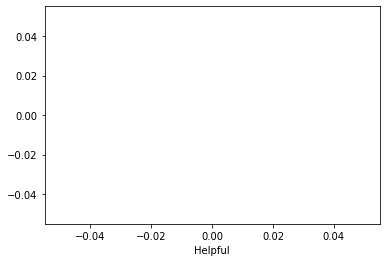

In [292]:
sns.scatterplot(data=df1, x="Helpful")

In [293]:
df1['Helpful'].describe()

count    542664.000000
mean         53.096802
std         266.525417
min           0.000000
25%           0.000000
50%           8.000000
75%          35.000000
max       27354.000000
Name: Helpful, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f671cbbfad0>]],
      dtype=object)

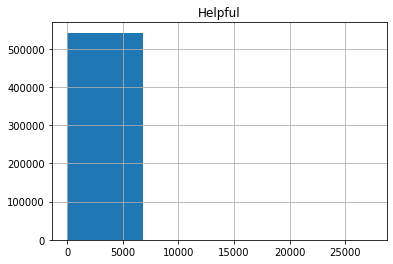

In [294]:
df1.hist(bins=4)

In [295]:
df1=df1.reset_index()

In [296]:
df1['label_code'] = pd.cut(x=df1['Helpful'], bins=[-1, 8, 35, 27355], labels=['0', '1', '2'])

In [297]:
df2 = df1[0:100000]

In [298]:
df2['Helpful'].describe()

count    100000.000000
mean         53.414440
std         274.804652
min           0.000000
25%           0.000000
50%           8.000000
75%          35.000000
max       27354.000000
Name: Helpful, dtype: float64

In [299]:
df2 = df1[100000:200000]
df2['Helpful'].describe()

count    100000.000000
mean         53.023110
std         268.220622
min           0.000000
25%           0.000000
50%           8.000000
75%          34.000000
max       24783.000000
Name: Helpful, dtype: float64

In [300]:
df2 = df1[200000:300000]
df2['Helpful'].describe()

count    100000.000000
mean         51.904310
std         248.348625
min           0.000000
25%           0.000000
50%           8.000000
75%          34.000000
max       25287.000000
Name: Helpful, dtype: float64

In [301]:
df2 = df1[300000:400000]
df2['Helpful'].describe()

count    100000.000000
mean         48.587200
std         276.150735
min           0.000000
25%           0.000000
50%           7.000000
75%          30.000000
max       27297.000000
Name: Helpful, dtype: float64

In [302]:
df2 = df1[400000:]
df2['Helpful'].describe()

count    142664.000000
mean         56.922678
std         264.819862
min           0.000000
25%           0.000000
50%          10.000000
75%          38.000000
max       25408.000000
Name: Helpful, dtype: float64

In [303]:
df2 = df1[400000:]
df2['AvgRating']=df2['AvgRating'].astype(float)
df2.groupby('AvgRating').count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Id,Group,SalesRank,TotalReviews,Helpful,Votes,HelpfulVotes,ASIN,label_code
AvgRating,,,,,,,,,
0.0,30920,30920,30920,30920,30920,30920,30920,30920,30920
1.0,803,803,803,803,803,803,803,803,803
1.5,250,250,250,250,250,250,250,250,250
2.0,1166,1166,1166,1166,1166,1166,1166,1166,1166
2.5,1985,1985,1985,1985,1985,1985,1985,1985,1985
3.0,5995,5995,5995,5995,5995,5995,5995,5995,5995
3.5,9711,9711,9711,9711,9711,9711,9711,9711,9711
4.0,23135,23135,23135,23135,23135,23135,23135,23135,23135
4.5,28547,28547,28547,28547,28547,28547,28547,28547,28547


In [304]:
df2.groupby('label_code').count()

,Id,Group,SalesRank,TotalReviews,AvgRating,Helpful,Votes,HelpfulVotes,ASIN
label_code,,,,,,,,,
0,68103,68103,68103,68103,68103,68103,68103,68103,68103
1,37031,37031,37031,37031,37031,37031,37031,37031,37031
2,37530,37530,37530,37530,37530,37530,37530,37530,37530


In [305]:
df1

,Id,Group,SalesRank,TotalReviews,AvgRating,Helpful,Votes,HelpfulVotes,ASIN,label_code
0,1,Book,396585,2,5.0,14,16,2,0827229534,1
1,2,Book,168596,12,4.5,76,84,8,0738700797,2
2,3,Book,1270652,1,5.0,2,2,0,0486287785,0
3,4,Book,631289,1,4.0,1,1,0,0842328327,0
4,5,Book,455160,0,0.0,0,0,0,1577943082,0
...,...,...,...,...,...,...,...,...,...,...
542659,548547,DVD,0,1,5.0,0,2,2,B000059TOC,0
542660,548548,DVD,0,8,3.0,25,36,11,B00006JBIX,1
542661,548549,Book,0,1,4.0,3,7,4,0879736836,0
542662,548550,DVD,0,3,5.0,6,6,0,B00008DDST,0


In [306]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(df1[['Group']]).toarray())
df1 = df1.join(encoder_df)

In [307]:
df1=df1.drop('Group',axis=1)

In [308]:
df1

,Id,SalesRank,TotalReviews,AvgRating,Helpful,Votes,HelpfulVotes,ASIN,label_code,0,1,2,3
0,1,396585,2,5.0,14,16,2,0827229534,1,1.0,0.0,0.0,0.0
1,2,168596,12,4.5,76,84,8,0738700797,2,1.0,0.0,0.0,0.0
2,3,1270652,1,5.0,2,2,0,0486287785,0,1.0,0.0,0.0,0.0
3,4,631289,1,4.0,1,1,0,0842328327,0,1.0,0.0,0.0,0.0
4,5,455160,0,0.0,0,0,0,1577943082,0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
542659,548547,0,1,5.0,0,2,2,B000059TOC,0,0.0,1.0,0.0,0.0
542660,548548,0,8,3.0,25,36,11,B00006JBIX,1,0.0,1.0,0.0,0.0
542661,548549,0,1,4.0,3,7,4,0879736836,0,1.0,0.0,0.0,0.0
542662,548550,0,3,5.0,6,6,0,B00008DDST,0,0.0,1.0,0.0,0.0
